In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import time

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [5]:
df.shape

(7352, 563)

In [6]:
df_test = pd.read_csv("test.csv")

In [7]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [8]:
df_test.shape

(2947, 563)

In [9]:
#Check for null values in both train and test sets 

In [10]:
df.isnull().values.sum()

0

In [11]:
df_test.isnull().values.sum()

0

In [12]:
#Check for data imbalance by visualizing the data provided

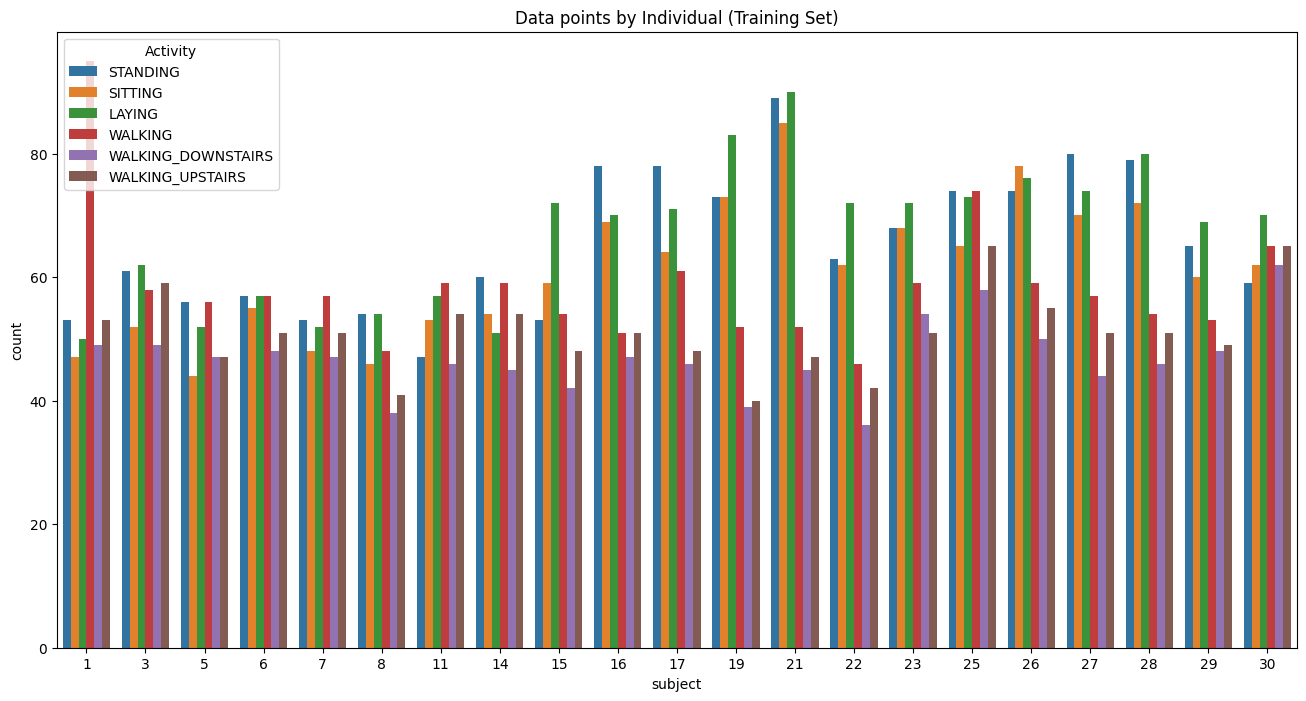

In [13]:
plt.figure(figsize=(16,8))
plt.title("Data points by Individual (Training Set)")
sns.countplot(x="subject",hue="Activity", data=df)
plt.savefig('Individuals.png')
plt.show()

In [14]:
list(df.columns)

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

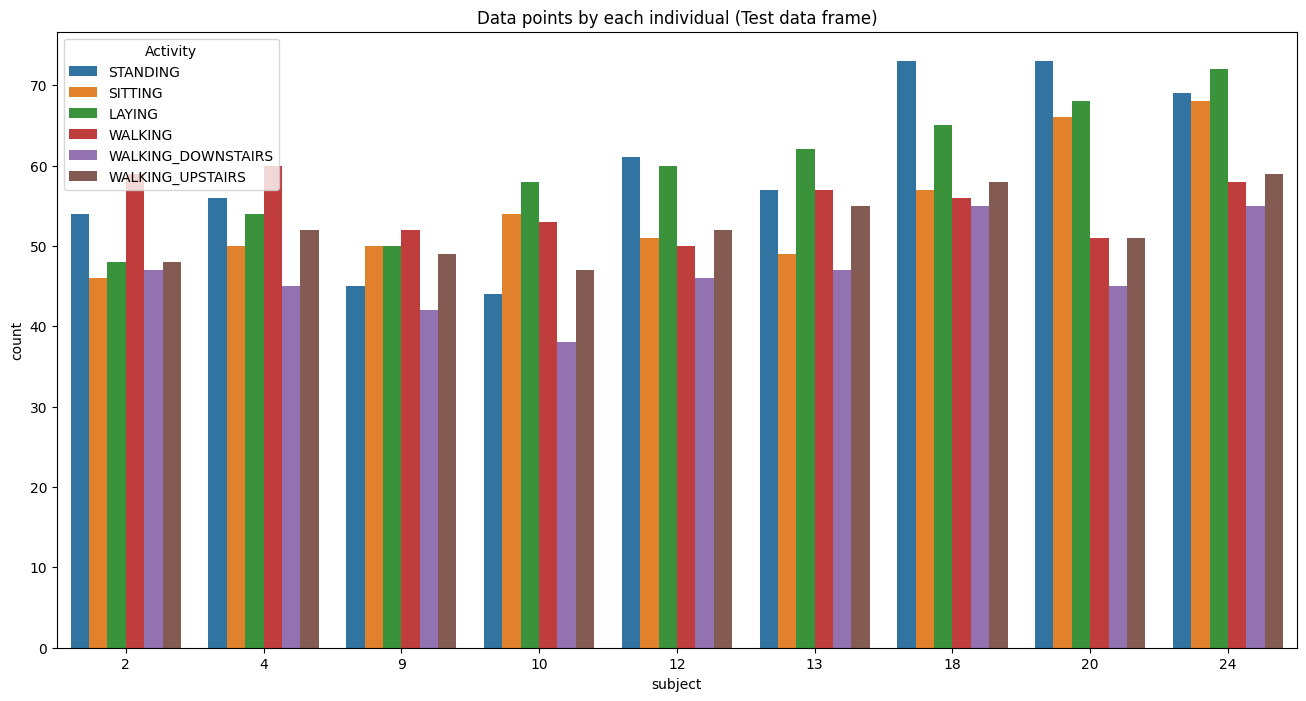

In [15]:
plt.figure(figsize=(16,8))
plt.title("Data points by each individual (Test data frame)")
sns.countplot(x="subject",hue="Activity", data=df_test)
plt.savefig('IndividualsTestingReal.png')
plt.show()

In [16]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


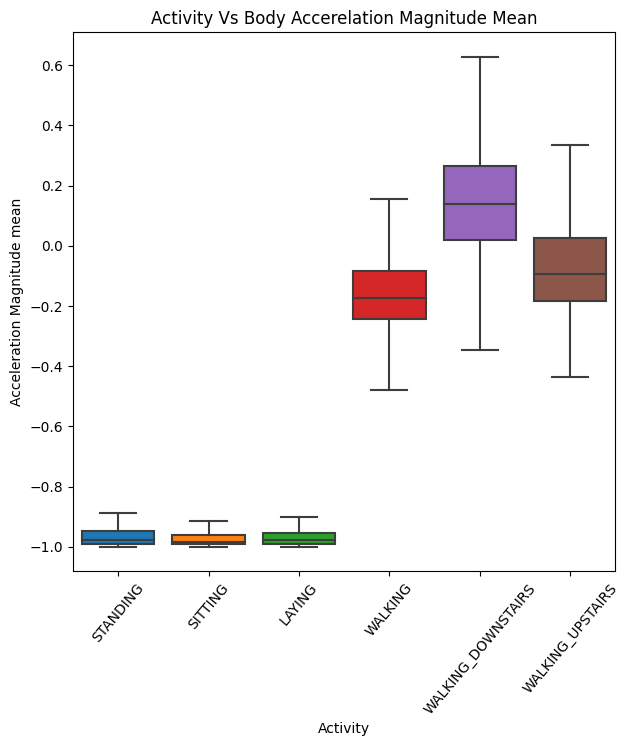

In [17]:
plt.figure(figsize=(7,7))
plt.title("Activity Vs Body Accerelation Magnitude Mean")
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=50)
plt.savefig('ActivityVsBodyAccerelation.png')
plt.show()

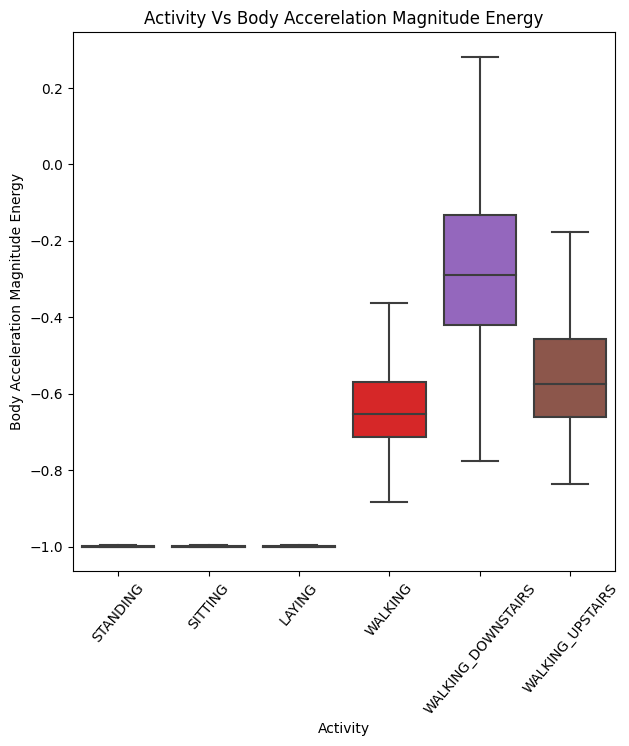

In [18]:
plt.figure(figsize=(7,7))
plt.title("Activity Vs Body Accerelation Magnitude Energy")
sns.boxplot(x='Activity', y='tBodyAccMag-energy()',data=df, showfliers=False, saturation=1)
plt.ylabel('Body Acceleration Magnitude Energy')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=50)
plt.savefig('ActivityVsBodyAccerelationEnergy.png')
plt.show()

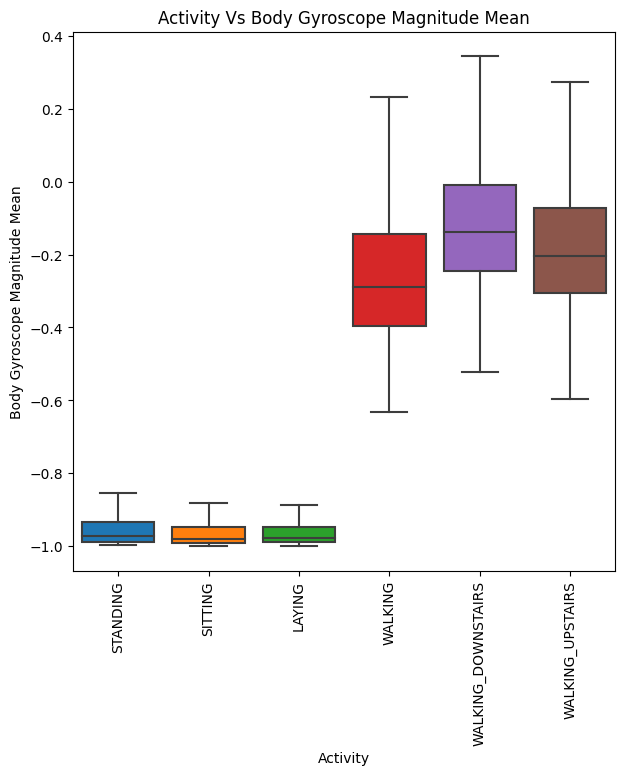

In [19]:
plt.figure(figsize=(7,7))
plt.title("Activity Vs Body Gyroscope Magnitude Mean")
sns.boxplot(x='Activity', y='tBodyGyroMag-mean()',data=df, showfliers=False, saturation=2)
plt.ylabel('Body Gyroscope Magnitude Mean')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
#plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.savefig('ActivityVsBodyGyroscopeMean.png')
plt.show()

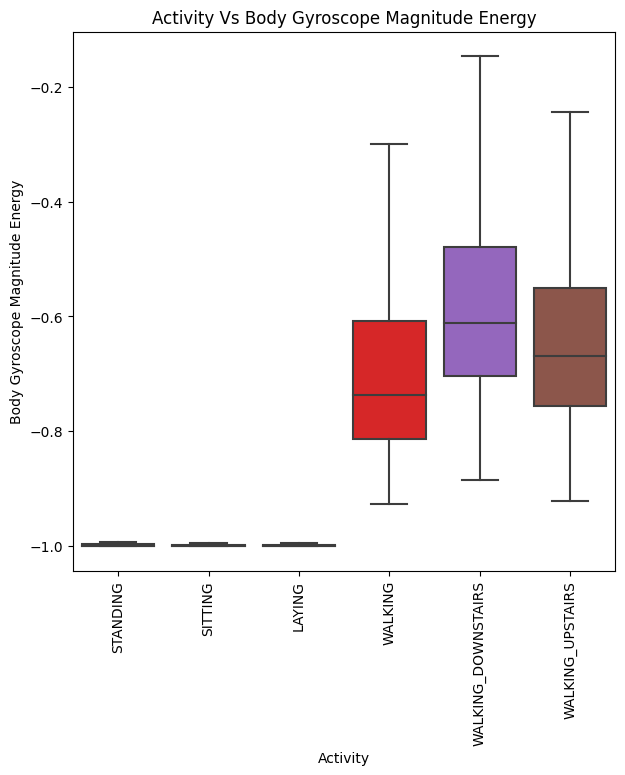

In [20]:
plt.figure(figsize=(7,7))
plt.title("Activity Vs Body Gyroscope Magnitude Energy")
sns.boxplot(x='Activity', y='tBodyGyroMag-energy()',data=df, showfliers=False, saturation=2)
plt.ylabel('Body Gyroscope Magnitude Energy')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

In [21]:
df.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

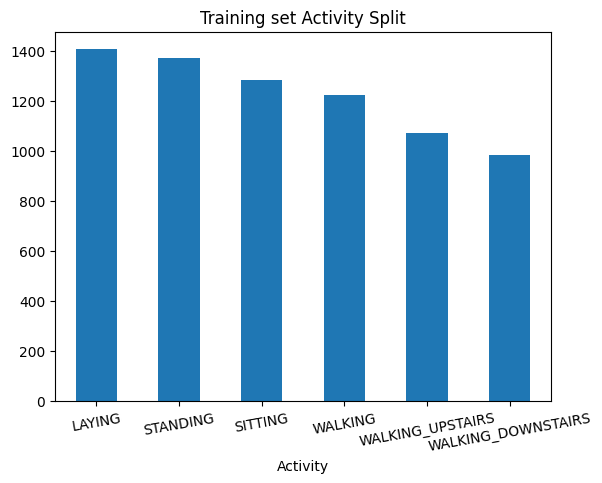

In [22]:
df.Activity.value_counts().plot(kind='bar')
plt.title("Training set Activity Split")
plt.xticks(rotation=10)
plt.savefig('ActivitySplitCountPlot.png')

In [23]:
df.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Text(0.5, 1.0, 'Testing set Activity Split')

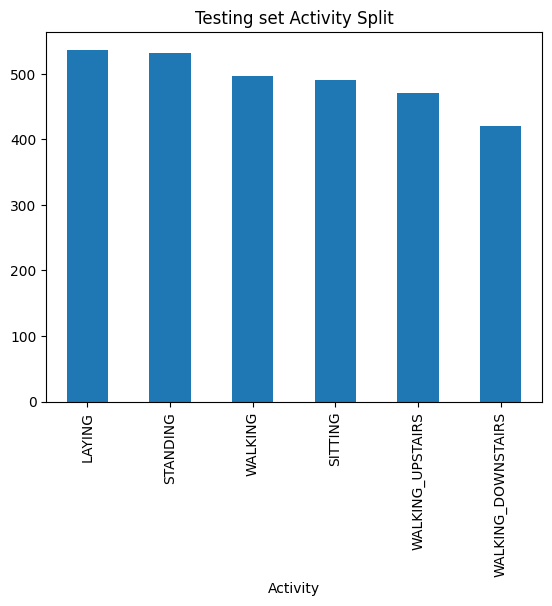

In [24]:
df_test.Activity.value_counts().plot(kind='bar')
plt.title("Testing set Activity Split")

In [25]:
# The data is quite high dimension so i got to reduce to size maybe by using PCA

In [26]:
#Lets normalize the data for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop(["subject","Activity"],axis=1)

In [27]:
X.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627


In [28]:
cleanup_nums = {"Activity":{"STANDING":0, "SITTING":1, "LAYING":2, "WALKING":3, "WALKING_DOWNSTAIRS":4, "WALKING_UPSTAIRS":5}}
df.replace(cleanup_nums,inplace=True)

In [29]:
y = df.Activity

In [30]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Activity, dtype: int64

In [31]:
Xpca=scaler.fit_transform(X)

In [32]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [33]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [34]:
Xpca

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

In [35]:
dfx = pd.DataFrame(data=Xpca,columns=df.columns[:-2])

In [36]:
#df.columns[:-1]

In [37]:
from sklearn.decomposition import PCA
pca = PCA (n_components = None)
dfx_pca = pca.fit(dfx)

In [38]:
dfx_pca

PCA()

In [39]:
np.sum (dfx_pca.explained_variance_ratio_)

0.9999999999999999

In [40]:
dfx_transform = pca.transform(dfx)
dfx_transform = pd.DataFrame(data=dfx_transform)

In [41]:
dfx_transform.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-16.138544,2.152024,3.144780,-0.272464,6.798938,-4.249394,2.937159,-4.905413,-0.775515,-3.627737,...,-1.446999e-16,5.799588e-16,6.018392e-16,1.068571e-16,7.167018e-16,6.746305e-17,1.560925e-17,1.925551e-16,-2.425290e-15,-3.118180e-15
1,-15.296194,1.387144,-0.682221,2.813677,4.266170,-2.055663,0.011205,-1.845985,0.492546,-0.180175,...,3.056698e-16,4.215817e-16,3.325096e-16,-2.453369e-17,1.661272e-16,5.282122e-17,-7.941617e-17,6.339794e-17,4.308127e-16,7.570610e-16
2,-15.137019,2.473351,-1.756641,3.717974,4.181557,-1.357518,0.072947,-1.388188,0.539754,-0.671712,...,3.061763e-17,3.799598e-16,2.465140e-16,6.761073e-18,-3.589781e-17,1.339566e-16,3.747188e-17,2.496417e-16,2.416249e-15,2.782796e-15
3,-15.350884,3.915681,-1.790322,2.567521,3.205840,-0.942944,0.530736,-1.832185,1.071517,-1.496989,...,-2.883545e-16,-2.333820e-16,5.758678e-17,1.963802e-16,6.159900e-17,-6.262530e-17,-7.986496e-17,3.338344e-16,-1.340332e-16,-9.245009e-17
4,-15.544814,4.598737,-2.188582,2.897578,3.080150,-1.061458,-1.048591,-0.816933,0.600063,1.118875,...,-8.670526e-17,3.222192e-17,-1.935614e-16,-8.645396e-17,5.428475e-17,2.215673e-16,-2.585671e-16,4.870946e-17,2.134354e-15,2.210058e-15


In [42]:
#Lets visualize the first 2 components

In [43]:
df.Activity.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

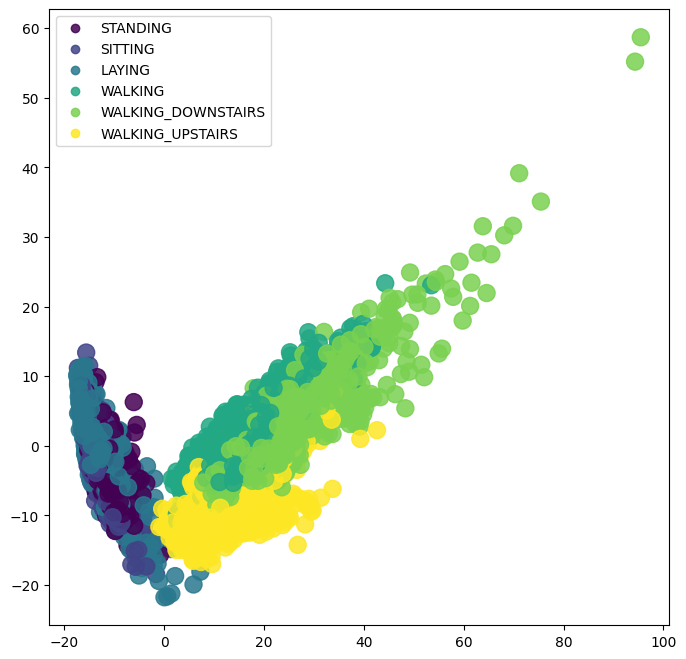

In [44]:
#colors = ListedColormap(['r','b','g'])
plt.figure(figsize=(8,8))
classes = ['STANDING', 'SITTING', 'LAYING', 'WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
scatter = plt.scatter(dfx_transform[0],dfx_transform[1],c=df.Activity,alpha=0.85,s=150)
#plt.legend(loc="upper left")
#scatter = plt.scatter(x, y, c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('PCA.png')

In [45]:
# Now lets model the data

In [46]:
Xtest = df_test.drop(['subject','Activity'],axis=1)

In [47]:
cleanup_nums = {"Activity":{"STANDING":0, "SITTING":1, "LAYING":2, "WALKING":3, "WALKING_DOWNSTAIRS":4, "WALKING_UPSTAIRS":5}}
df_test.replace(cleanup_nums,inplace=True)

In [98]:
labels = ["STANDING","SITTING","LAYING","WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

In [48]:
ytest = df_test.Activity

## Lets start with the XGboost Classifier.

In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
xgb = XGBClassifier()

In [53]:
parameters = {
    "n_estimators" : [10, 20],
    "max_depth" : [2, 3],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01]
}

In [54]:
gridsearchXGB = GridSearchCV(estimator = xgb,
                  param_grid = parameters,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [55]:
gridsearchXGB.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=10; neg_root_mean_squared_error: (test=-1.055) r2: (test=0.608) total time=   8.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=10; neg_root_mean_squared_error: (test=-0.780) r2: (test=0.785) total time=   9.7s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=10; neg_root_mean_squared_error: (test=-0.878) r2: (test=0.728) total time=  11.2s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=10; neg_root_mean_squared_error: (test=-1.397) r2: (test=0.312) total time=  12.8s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=10; neg_root_mean_squared_error: (test=-0.711) r2: (test=0.821) total time=  13.9s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=20; neg_root_mean_squared_error: (test=-1.056) r2: (test=0.607) total time=  29.7s
[CV 2/5] 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.01, 0.1], 'learning_rate': [0.001, 0.01],
                         'max_depth': [2, 3], 'n_estimators': [10, 20]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [56]:
print(gridsearchXGB.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


In [58]:
print(gridsearchXGB.best_params_) 

{'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 20}


In [59]:
print(gridsearchXGB.best_score_)

0.8570616403704155


In [51]:
xgb2 = XGBClassifier()

In [52]:
xgb2.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [53]:
preds = xgb2.predict(Xtest)

In [54]:
acc_xgb = (preds == ytest).sum().astype(float) / len(preds)*100

In [55]:
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 93.89


In [125]:
xgb = XGBClassifier(n_estimators=50)
training_start = time.perf_counter()
xgb.fit(X, y)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
predsxgb = xgb.predict(Xtest)
prediction_end = time.perf_counter()
acc_xgb = (predsxgb == ytest).sum().astype(float) / len(predsxgb)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 93.38
Time consumed for training: 82.277
Time consumed for prediction: 0.07749 seconds


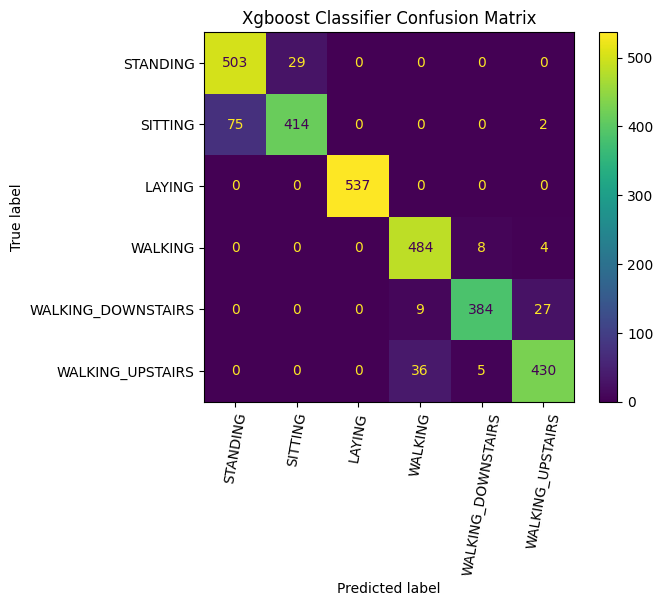

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, predsxgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels )#xgb.classes_)
disp.plot(cmap='viridis' ) #plt.cm.Purples)
plt.title("Xgboost Classifier Confusion Matrix")
plt.xticks(rotation=80)
plt.show()

In [127]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predsxgb, target_names=labels))

                    precision    recall  f1-score   support

          STANDING       0.87      0.95      0.91       532
           SITTING       0.93      0.84      0.89       491
            LAYING       1.00      1.00      1.00       537
           WALKING       0.91      0.98      0.94       496
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
  WALKING_UPSTAIRS       0.93      0.91      0.92       471

          accuracy                           0.93      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.93      0.93      2947



### Random forest classifier.

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfc = RandomForestClassifier(n_estimators=50)
training_start = time.perf_counter()
rfc.fit(X, y)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
predsrfc = rfc.predict(Xtest)
prediction_end = time.perf_counter()
acc_rfc = (predsrfc == ytest).sum().astype(float) / len(predsrfc)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 92.09
Time consumed for training: 21.992 seconds
Time consumed for prediction: 0.03704 seconds


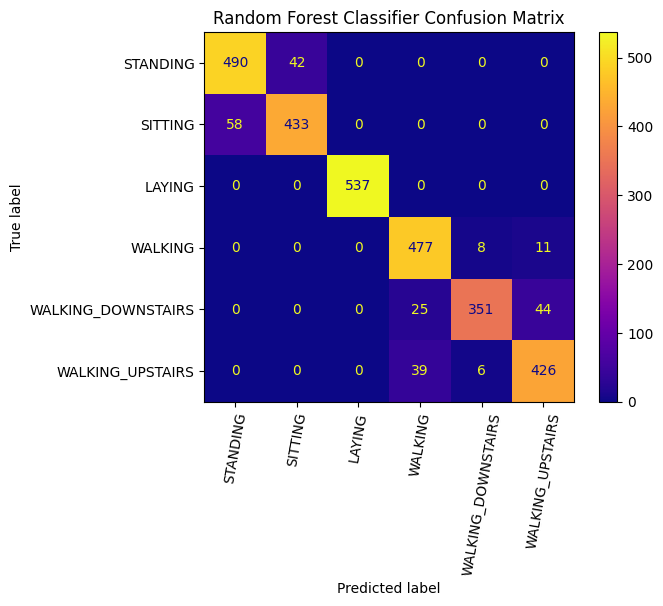

In [114]:
cm = confusion_matrix(ytest, predsrfc, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)#rfc.classes_)
disp.plot(cmap='plasma' ) #plt.cm.Purples)
plt.title("Random Forest Classifier Confusion Matrix")
plt.xticks(rotation=80)
plt.show()

In [118]:
print(classification_report(ytest, predsrfc, target_names=labels))

                    precision    recall  f1-score   support

          STANDING       0.89      0.92      0.91       532
           SITTING       0.91      0.88      0.90       491
            LAYING       1.00      1.00      1.00       537
           WALKING       0.88      0.96      0.92       496
WALKING_DOWNSTAIRS       0.96      0.84      0.89       420
  WALKING_UPSTAIRS       0.89      0.90      0.89       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



### Support Vector Machines 

In [69]:
from sklearn.svm import SVC

In [119]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X, y)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
predssvc = svc.predict(Xtest)
prediction_end = time.perf_counter()
acc_svc = (predssvc == ytest).sum().astype(float) / len(predssvc)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 95.05
Time consumed for training: 2.773 seconds
Time consumed for prediction: 4.19553 seconds


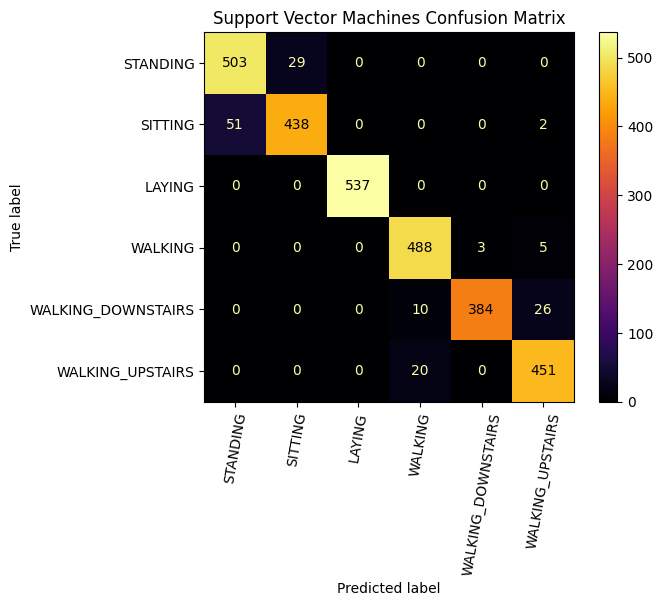

In [120]:
cm = confusion_matrix(ytest, predssvc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)#svc.classes_)
disp.plot(cmap='inferno' ) #plt.cm.Purples)
plt.title("Support Vector Machines Confusion Matrix")
plt.xticks(rotation=80)
plt.show()

In [121]:
print(classification_report(ytest, predssvc, target_names=labels))

                    precision    recall  f1-score   support

          STANDING       0.91      0.95      0.93       532
           SITTING       0.94      0.89      0.91       491
            LAYING       1.00      1.00      1.00       537
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.99      0.91      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



### DecisionTreeClassifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
dtc = DecisionTreeClassifier()
training_start = time.perf_counter()
dtc.fit(X,y)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
predsdtc = dtc.predict(Xtest)
prediction_end = time.perf_counter()
acc_dtc = (predsdtc == ytest).sum().astype(float) / len(predsdtc)*100
dtc_train_time = training_end-training_start
dtc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_dtc))
print("Time consumed for training: %4.3f seconds" % (dtc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (dtc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 85.88
Time consumed for training: 13.718 seconds
Time consumed for prediction: 0.01009 seconds


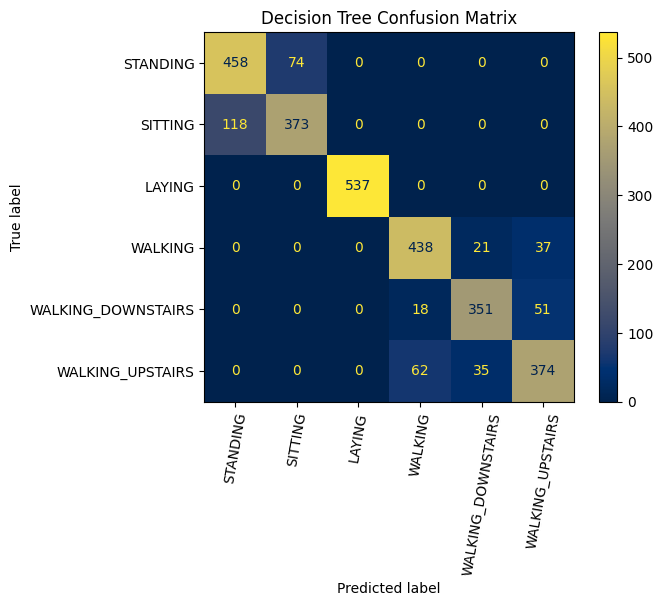

In [123]:
cm = confusion_matrix(ytest, predsdtc, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)#dtc.classes_)
disp.plot(cmap='cividis' ) #plt.cm.Purples)
plt.title("Decision Tree Confusion Matrix")
plt.xticks(rotation=80)
plt.show()

In [124]:
print(classification_report(ytest, predsdtc, target_names=labels))

                    precision    recall  f1-score   support

          STANDING       0.80      0.86      0.83       532
           SITTING       0.83      0.76      0.80       491
            LAYING       1.00      1.00      1.00       537
           WALKING       0.85      0.88      0.86       496
WALKING_DOWNSTAIRS       0.86      0.84      0.85       420
  WALKING_UPSTAIRS       0.81      0.79      0.80       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



### Cross Validation 

In [83]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=50)
scoresrfc = cross_val_score(rfc_cv, X, y, cv=10, scoring = "accuracy")
print("Scores:", scoresrfc)
print("Mean:", scoresrfc.mean()*100)
print("Standard Deviation:", scoresrfc.std())

Scores: [0.9388587  0.8736413  0.96598639 0.84897959 0.9170068  0.88027211
 0.96870748 0.97823129 0.95102041 0.93605442]
Mean: 92.5875850340136
Standard Deviation: 0.0422950905266169


In [84]:
xgb_cv = XGBClassifier(n_estimators=50)
scoresxgb = cross_val_score(xgb_cv, X, y, cv=10, scoring = "accuracy")
print("Scores:", scoresxgb)
print("Mean:", scoresxgb.mean())
print("Standard Deviation:", scoresxgb.std())

Scores: [0.96875    0.87907609 0.97414966 0.84897959 0.91292517 0.91020408
 0.98095238 0.97006803 0.95918367 0.94421769]
Mean: 0.9348506359065365
Standard Deviation: 0.04279236998712846


In [85]:
svc_cv = svc = SVC()
scoressvc = cross_val_score(svc_cv, X, y, cv=10, scoring = "accuracy")
print("Scores:", scoressvc)
print("Mean:", scoressvc.mean())
print("Standard Deviation:", scoressvc.std())

Scores: [0.98097826 0.87228261 0.96326531 0.85578231 0.94557823 0.92653061
 0.97959184 0.95510204 0.95918367 0.95918367]
Mean: 0.9397478556640048
Standard Deviation: 0.04079494253673944


In [86]:
clf_cv = DecisionTreeClassifier()
scoresclf = cross_val_score(clf_cv, X, y, cv=10, scoring = "accuracy")
print("Scores:", scoresclf)
print("Mean:", scoresclf.mean())
print("Standard Deviation:", scoresclf.std())

Scores: [0.88994565 0.7826087  0.90884354 0.75510204 0.83945578 0.84761905
 0.88163265 0.88979592 0.90612245 0.88027211]
Mean: 0.8581397885241053
Standard Deviation: 0.0497093403521196


In [87]:
results = pd.DataFrame({
    'Algorithm': [ 
              'XGBoost', 'Random Forest', 'SVC', 'Decision Tree'],
    'Score': [acc_xgb, acc_rfc, acc_svc, acc_clf],
    'Training_Runtime (s)': [xgb_train_time, rfc_train_time, 
                         svc_train_time,clf_train_time],
    'Prediction_Runtime (s)': [xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time,clf_prediction_time],
    'Mean_Cross_Validation_Score': [scoresxgb.mean()*100,scoresrfc.mean()*100,scoressvc.mean()*100,scoresclf.mean()*100]
})

results

,Algorithm,Score,Training_Runtime (s),Prediction_Runtime (s),Mean_Cross_Validation_Score
0,XGBoost,93.383101,101.597877,0.088905,93.485064
1,Random Forest,91.245334,21.472701,0.069717,92.587585
2,SVC,95.045809,2.898723,4.403509,93.974786
3,Decision Tree,86.019681,13.291676,0.010217,85.813979
